<font size="5">Association Rule Mining</font>

Dataset - groceries.csv

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing
dataset1 = pd.read_csv('groceries.csv')
groceries = []
for i in range(0, 9835):
    groceries.append([str(dataset1.values[i,j]) for j in range(0, 32)])


In [2]:
#1 Apply association rule mining on the groceries dataset 
#Use min_sup = 0.003, min_conf = 0.3, min_lift = 2 and min_length = 2

# Training Apriori on the dataset
from apyori import apriori
rules = apriori(groceries,min_support = 0.003, min_confidence = 0.3, min_lift = 2, min_length = 2)

# Visualising the results
results = list(rules)
results

[RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.003050330452465684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.379746835443038, lift=11.42143769597027)]),
 RelationRecord(items=frozenset({'baking powder', 'other vegetables'}), support=0.007320793085917641, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'other vegetables'}), confidence=0.41379310344827586, lift=2.138547121604726)]),
 RelationRecord(items=frozenset({'whole milk', 'baking powder'}), support=0.009252669039145907, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whole milk'}), confidence=0.5229885057471264, lift=2.0467934556398677)]),
 RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef

<font size="5"> Top 5 rules</font>

 
# Rule 1
    Instant food products -> hamburger meat  
    Support : 0.003050330452465684
    Confidence : 0.379746835443038
    Lift : 11.42143769597027


# Rule 2
    baking powder -> other vegetables
    Support    : 0.007320793085917641
    Confidence : 0.41379310344827586
    Lift       : 2.138547121604726

# Rule 3
    baking powder -> Whole milk
     Support    : 0.009252669039145907
     Confidence : 0.5229885057471264
     Lift       : 2.0467934556398677

# Rule 4
    beef -> root vegetables
     Support    : 0.017386883579054397
     Confidence : 0.3313953488372093
     Lift       : 3.0403668431100312

# Rule 5
    berries -> Yogurt
     Support    : 0.010574478901881037
     Confidence : 0.3180428134556575
     Lift       : 2.279847718904075


In [3]:
#3 Play with min_sup to find the rule with maximum support value (Keeping other configurations same)


from apyori import apriori
rules = apriori(groceries,min_support = 0.04, min_confidence = 0.3, min_lift = 2, min_length = 2)

# Visualising the results
results = list(rules)
results[0]

RelationRecord(items=frozenset({'root vegetables', 'other vegetables'}), support=0.047381799694966954, ordered_statistics=[OrderedStatistic(items_base=frozenset({'root vegetables'}), items_add=frozenset({'other vegetables'}), confidence=0.43470149253731344, lift=2.2466049285887952)])

In [4]:
#4 Play with min_conf to find the rule with maximum confidence value (Keeping other configurations same)

from apyori import apriori
rules = apriori(groceries,min_support = 0.003, min_confidence = 0.885, min_lift = 2, min_length = 2)

# Visualising the results
results = list(rules)
results[0]



RelationRecord(items=frozenset({'tropical fruit', 'citrus fruit', 'root vegetables', 'whole milk', 'other vegetables'}), support=0.00315200813421454, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whole milk', 'tropical fruit', 'citrus fruit', 'root vegetables'}), items_add=frozenset({'other vegetables'}), confidence=0.8857142857142858, lift=4.577509196006306)])

In [5]:
#5 Play with min_lift to find the rule with maximum lift value (Keeping other configurations same)

from apyori import apriori
rules = apriori(groceries,min_support = 0.003, min_confidence = 0.3, min_lift = 11, min_length = 2)

# Visualising the results
results = list(rules)
results[0]



RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.003050330452465684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.379746835443038, lift=11.42143769597027)])

<font size="5">Simple Linear Regression</font>

In this example you will consider sales based on 'TV' marketing budget.

You will build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

Dataset - tvmarketing.csv

In [6]:
#6 Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#7 Import dataset and display first 5 rows
dataset = pd.read_csv('tvmarketing.csv')
dataset.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
#8 Display last 5 rows
dataset.tail(5)


,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [9]:
#9 Check column data types
dataset.dtypes

TV       float64
Sales    float64
dtype: object

In [10]:
#10 Check the shape of the DataFrame (rows, columns)

dataset.shape

(200, 2)

In [11]:
#11 Look at summary statistics
dataset.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


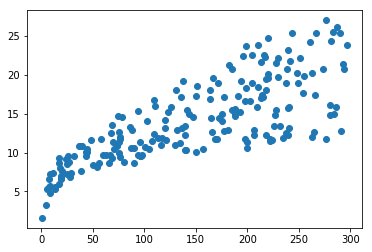

In [12]:
#12 Visualise the relationship between the features and the dependent variable using scatterplots

plt.scatter(dataset['TV'],dataset['Sales'])
plt.show()

In [13]:
#13 Prepare  X (feature variables) and y (response variable)

X= dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

In [14]:
#14 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [15]:
#15 Print the shape of train data and test data
X_train.shape , y_train.shape ,X_test.shape , y_test.shape

((140, 1), (140,), (60, 1), (60,))

In [16]:
#16 Perform Lineear Regression (on train data) withouth using any library and print the coefficients values
s=np.arange(140)
s=s.reshape(140,1)
s=np.ones_like(s)
s=np.hstack((s,X_train))
s=np.matrix(s)
#s= np.append(arr = np.ones((140,1)).astype(int),values = X_train,axis = 1)
x_transpose=s.getT()
x_trans_x = x_transpose * s
x_inverse = x_trans_x.getI()
ytrain= np.vstack(y_train)
ytrain = np.matrix(ytrain)
w = x_transpose * ytrain
w = x_inverse * w
w

matrix([[7.31081017],
        [0.04581434]])

In [17]:
y_test

array([11.3,  8.4,  8.7, 25.4, 11.7,  8.7,  7.2, 13.2,  9.2, 16.6, 24.2,
       10.6, 10.5, 15.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       14.9, 12.9,  8.1, 15.2, 12.6, 22.6, 11.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 12.9, 13.6,  7.2, 10.8,  9.5, 15. , 15.9,
       17.1, 14. ,  4.8,  8.7, 15.9, 10.4, 12.4, 19.7, 17.6, 15.5, 10.1,
        9.7, 21.4, 14.4, 16.6,  5.5])

In [18]:
#17 Create the model using the calculated coefficients and make predictions on the testing set
ypred =[]
for i in range(0,len(X_test)):
    ypred.append(w[0]+(w[1] * X_test[i]))
ypred

[matrix([[10.48116264]]),
 matrix([[9.60152727]]),
 matrix([[11.4524267]]),
 matrix([[20.58322509]]),
 matrix([[15.1084112]]),
 matrix([[9.8855762]]),
 matrix([[7.70939494]]),
 matrix([[18.31083372]]),
 matrix([[8.40119151]]),
 matrix([[16.36372418]]),
 matrix([[19.28209777]]),
 matrix([[11.3058208]]),
 matrix([[14.48533615]]),
 matrix([[15.91474363]]),
 matrix([[10.81102591]]),
 matrix([[12.81769409]]),
 matrix([[19.47909945]]),
 matrix([[7.3428802]]),
 matrix([[10.73314153]]),
 matrix([[17.08759078]]),
 matrix([[20.48701497]]),
 matrix([[13.73856237]]),
 matrix([[15.33290148]]),
 matrix([[13.34455903]]),
 matrix([[9.76187747]]),
 matrix([[12.95055569]]),
 matrix([[14.89766523]]),
 matrix([[16.70275031]]),
 matrix([[17.57322281]]),
 matrix([[8.46075015]]),
 matrix([[10.41702256]]),
 matrix([[16.42328282]]),
 matrix([[20.17089601]]),
 matrix([[18.38413667]]),
 matrix([[7.91555948]]),
 matrix([[8.16753836]]),
 matrix([[10.04134496]]),
 matrix([[15.59404323]]),
 matrix([[10.44451117]]),


In [19]:
#18 Perform Linear Regression using library
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#19 Print the intercept and coefficients --- regressor is 
print(regressor.intercept_)
print((regressor.coef_))

7.31081016541168
[0.04581434]


In [21]:
#20 Make predictions on the testing set - y_pred

y_pred = regressor.predict(X_test)
y_pred

array([10.48116264,  9.60152727, 11.4524267 , 20.58322509, 15.1084112 ,
        9.8855762 ,  7.70939494, 18.31083372,  8.40119151, 16.36372418,
       19.28209777, 11.3058208 , 14.48533615, 15.91474363, 10.81102591,
       12.81769409, 19.47909945,  7.3428802 , 10.73314153, 17.08759078,
       20.48701497, 13.73856237, 15.33290148, 13.34455903,  9.76187747,
       12.95055569, 14.89766523, 16.70275031, 17.57322281,  8.46075015,
       10.41702256, 16.42328282, 20.17089601, 18.38413667,  7.91555948,
        8.16753836, 10.04134496, 15.59404323, 10.44451117,  8.45616872,
        9.00135939,  8.75396194, 13.85767966, 16.91349628, 17.17921947,
       12.01594311,  7.70481351,  8.08507255, 13.06967298, 12.10299036,
       12.34122494, 17.82520169, 18.93849021, 15.78188203,  9.35871126,
       10.16504368, 20.72983099, 15.21378419, 16.58821446,  7.64525486])

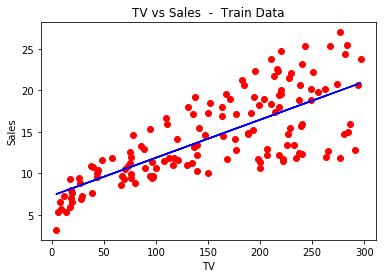

In [22]:
#21 Plot train data and the model

plt.scatter(X_train,y_train,color= 'red')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title("TV vs Sales  -  Train Data")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

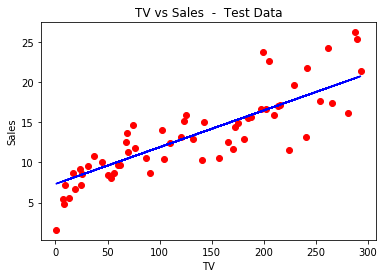

In [23]:
#22 Plot test data and the model


plt.scatter(X_test,y_test,color= 'red')
plt.plot(X_test, regressor.predict(X_test),color='blue')
plt.title("TV vs Sales  -  Test Data")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [24]:
#23 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [25]:
regressor.score(X_test,y_test)

0.725606346597073

In [26]:
#24 Calculate and print R Squared and Adjusted R Squared values withouth any library
ssm = 0
sst =0
for i in range(0,len(y_test)):
    ssm += ((y_test - y_pred) ** 2).sum()
    sst +=((y_test - y_test.mean()) ** 2).sum()
    
r_square = 1-(ssm/sst)
adjusted_r_square = 1-((len(y_test)-1)/(len(y_test)-(dataset.shape[1]-1)))*(1-r_square)
r_square , adjusted_r_square

(0.725606346597073, 0.725606346597073)